<a href="https://colab.research.google.com/github/Adrok24/curso_digital_house/blob/master/2_PRACTICA_INDEPENDIENTE_LeNet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inteligencia Artificial
# Clase 13 - Deep Learning para Computer Vision 1

## Replicando una arquitectura convolucional clásica: LeNet - 5

En el año 1998, Yann LeCunn, uno de los pioneros del *deep learning*, desarrolló junto a un equipo de investigadores la primera red neuronal convolucional aplicada con éxito a problemas de OCR, en particular, el reconocimiento de códigos postales escritos a mano para facilitar el trabajo del US Postal Service. La red desarrollada, conocida con el nombre de LeNet-5, consta de las siguientes capas:

1. Conv2D: 6 *feature maps* de *output*, *kernel* de 5x5, *padding* y activación tanh
2. AveragePooling2D: *pool size* de 2x2
3. Conv2D: 16 *feature maps* de *output*, *kernel* de 5x5, activación tanh
4. AveragePooling2D: *pool size* de 2x2
5. Dense: 120 neuronas de *output* activadas con tanh
6. Dense: 84 neuronas de *output* activadas con tanh
7. Dense: 10 neuronas de *output* activadas con softmax

<img src="https://engmrk.com/wp-content/uploads/2018/09/LeNet_Original_Image.jpg"/>

### Ejercicio 1

Reproducí esta arquitectura en Keras y entrená un clasificador sobre el dataset de Fashion-MNIST. ¿Logra mejorar la *performance* anteriormente obtenida esta arquitectura convolucional?

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AveragePooling2D, Dropout

In [112]:
def build_model(activation='tanh', pooling=AveragePooling2D(pool_size=(2,2)), dropout=False):
  model = Sequential()
  # The input shape of the dataset is (28,28), so we need to add padding to keep 
  # the same dimensions of feature maps
  model.add(Conv2D(filters=6,
                  kernel_size=(5,5),
                  activation=activation,
                  input_shape=(28,28,1),
                  padding='same'))
  model.add(pooling)

  # Output = 28/2 = 14 ---> (14,14,6)

  model.add(Conv2D(filters=16,
                  kernel_size=(5,5),
                  activation=activation,
                  ))
  # Output = ((14-5)/1)+1=10 ---> (10,10,16)

  model.add(pooling)

  model.add(Flatten())
  model.add(Dense(120, activation=activation))
  if dropout:
    model.add(Dropout(0.3))  
  model.add(Dense(84, activation=activation))
  if dropout:
    model.add(Dropout(0.3))
  model.add(Dense(10, activation='softmax'))
  # Output = 10/2 = 5 ---> (5,5,16)
  return model
first_model = build_model()
first_model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_15 (Averag multiple                  0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
flatten_22 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_63 (Dense)             (None, 84)                10164     
_________________________________________________________________
dense_64 (Dense)             (None, 10)              

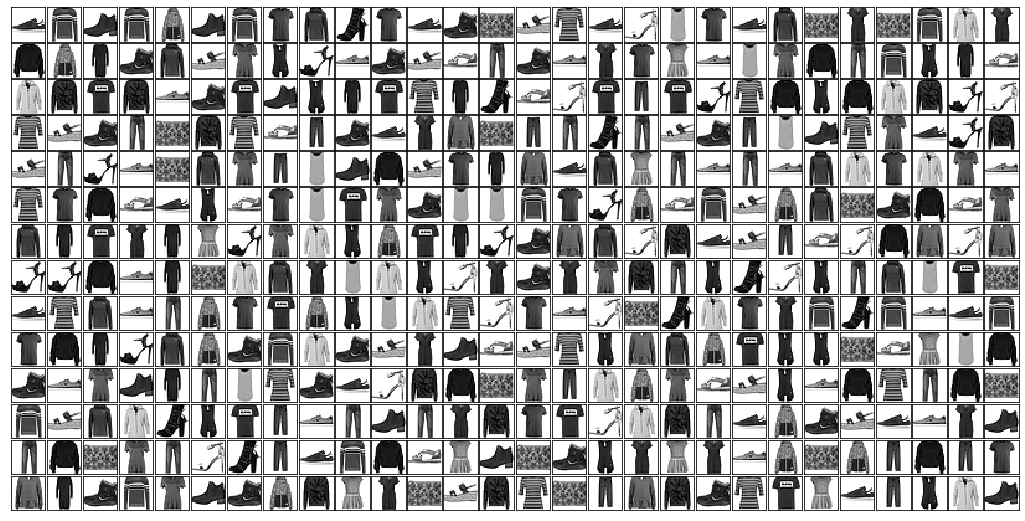

In [113]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

fig = plt.figure(figsize=(14, 14))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i, j in enumerate(np.random.choice(train_images[0].shape[0], 392)):
    ax = fig.add_subplot(28, 28, i + 1, xticks=[], yticks=[]) 
    ax.imshow(train_images[j].reshape((28,28)), cmap=plt.cm.binary,
              interpolation='nearest') 


In [114]:
from tensorflow.keras.utils import to_categorical

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [115]:
first_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [116]:
first_model.fit(train_images, train_labels, epochs=200, batch_size=1024)

Epoch 1/200
59/59 [==============================] - 1s 9ms/step - loss: 1.0380 - accuracy: 0.6301
Epoch 2/200
59/59 [==============================] - 0s 7ms/step - loss: 0.5862 - accuracy: 0.7819
Epoch 3/200
59/59 [==============================] - 0s 7ms/step - loss: 0.5054 - accuracy: 0.8187
Epoch 4/200
59/59 [==============================] - 0s 7ms/step - loss: 0.4554 - accuracy: 0.8374
Epoch 5/200
59/59 [==============================] - 0s 7ms/step - loss: 0.4237 - accuracy: 0.8486
Epoch 6/200
59/59 [==============================] - 0s 7ms/step - loss: 0.4010 - accuracy: 0.8559
Epoch 7/200
59/59 [==============================] - 0s 7ms/step - loss: 0.3812 - accuracy: 0.8628
Epoch 8/200
59/59 [==============================] - 0s 7ms/step - loss: 0.3676 - accuracy: 0.8674
Epoch 9/200
59/59 [==============================] - 0s 7ms/step - loss: 0.3545 - accuracy: 0.8738
Epoch 10/200
59/59 [==============================] - 0s 7ms/step - loss: 0.3429 - accuracy: 0.8763
Epoch 11/

In [117]:
test_loss, test_acc = first_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.7274 - accuracy: 0.8905


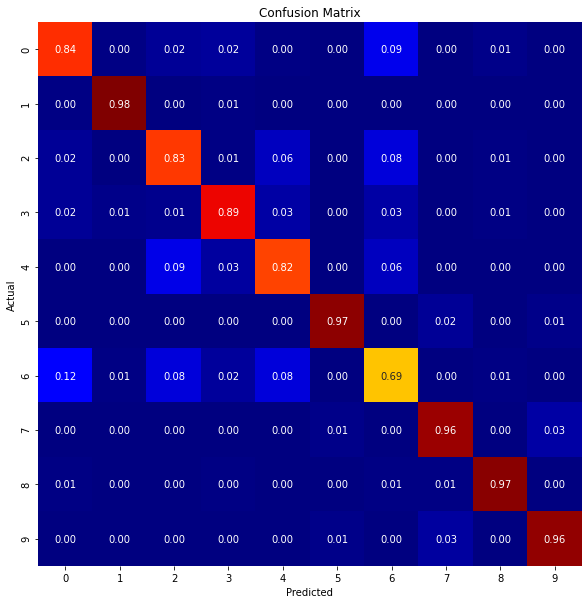

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1000
           1       0.98      0.98      0.98      1000
           2       0.80      0.83      0.82      1000
           3       0.91      0.89      0.90      1000
           4       0.83      0.82      0.82      1000
           5       0.97      0.97      0.97      1000
           6       0.72      0.69      0.70      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [118]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def graph_confussion_matrix(y_pred, test_labels):
  test_pred = np.argmax(y_pred, axis=1)
  test_labels_ = np.argmax(test_labels, axis=1)
      
  # Confusion Matrix
  fig, ax = plt.subplots(figsize=(10,10))
  conf_matrix = confusion_matrix(test_labels_, test_pred)
  conf_matrix = conf_matrix/np.sum(conf_matrix, axis=1)

  sns.heatmap(conf_matrix, annot=True, fmt=".2f", square=True, cbar=False, 
              cmap=plt.cm.jet, ax=ax)
  ax.set_ylabel('Actual')
  ax.set_xlabel('Predicted')
  ax.set_title('Confusion Matrix')
  plt.show()

  print('Classification Report:')
  print(classification_report(test_labels_, test_pred))

y_pred = first_model.predict(test_images)
graph_confussion_matrix(y_pred, test_labels)

### Ejercicio 2

Cuando el equipo de LeCunn desarrolló esta red, todavía no estaba difundido el uso de activaciones ReLU ni se había descubierto la técnica del Dropout. Modificá la arquitectura para incluir estas alternativas y reemplazá también el Average Pooling por Max Pooling. ¿Cómo impactan estos cambios en los resultados?

In [119]:
second_model = build_model(activation='relu', pooling=MaxPooling2D(2,2), dropout=False)
second_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
second_model.fit(train_images, train_labels, epochs=200, batch_size=1024)

Epoch 1/200
59/59 [==============================] - 1s 9ms/step - loss: 1.1922 - accuracy: 0.6198
Epoch 2/200
59/59 [==============================] - 0s 7ms/step - loss: 0.6099 - accuracy: 0.7666
Epoch 3/200
59/59 [==============================] - 0s 7ms/step - loss: 0.5205 - accuracy: 0.8059
Epoch 4/200
59/59 [==============================] - 0s 7ms/step - loss: 0.4690 - accuracy: 0.8285
Epoch 5/200
59/59 [==============================] - 0s 7ms/step - loss: 0.4267 - accuracy: 0.8467
Epoch 6/200
59/59 [==============================] - 0s 7ms/step - loss: 0.4034 - accuracy: 0.8552
Epoch 7/200
59/59 [==============================] - 0s 8ms/step - loss: 0.3850 - accuracy: 0.8615
Epoch 8/200
59/59 [==============================] - 0s 8ms/step - loss: 0.3652 - accuracy: 0.8697
Epoch 9/200
59/59 [==============================] - 0s 7ms/step - loss: 0.3509 - accuracy: 0.8742
Epoch 10/200
59/59 [==============================] - 0s 7ms/step - loss: 0.3396 - accuracy: 0.8793
Epoch 11/

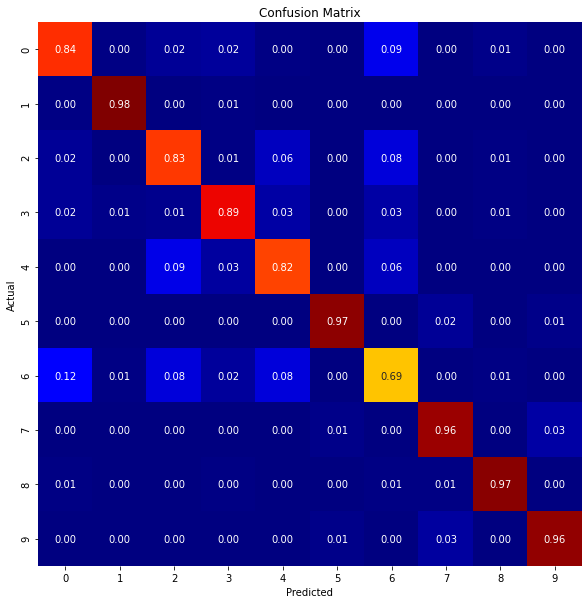

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1000
           1       0.98      0.98      0.98      1000
           2       0.80      0.83      0.82      1000
           3       0.91      0.89      0.90      1000
           4       0.83      0.82      0.82      1000
           5       0.97      0.97      0.97      1000
           6       0.72      0.69      0.70      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [120]:
y_pred_2 = first_model.predict(test_images)
graph_confussion_matrix(y_pred_2, test_labels)